In [1]:
import os
import math
import pygame
import numba
import cv2
import timeit
from pygame.locals import *
from octree_with_nodes import OctreeNode
from octree_with_nodes import Octree
from octree_with_nodes import Point
from octree_with_nodes import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import numpy as np
from PIL import Image

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


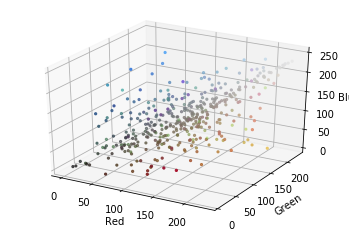

In [2]:
allImages = './Stock Pictures'
mainImage = './main_image/'
files = [os.path.join(allImages,f) for f in os.listdir(allImages) if os.path.isfile(os.path.join(allImages,f))]
mainFile = [os.path.join(mainImage,f) for f in os.listdir(mainImage) if os.path.isfile(os.path.join(mainImage,f))]

# print("done getting images")

sizeMainImg = 640,640
sizeAllImg = 150,150

redList = []
greenList = []
blueList = []
rgbList = []
colors = []
imgDict = {}

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

boundary = Rectangle(127.5,127.5,127.5,127.5,127.5)
tree = Octree(boundary,math.ceil(len(files)/10))

for i,file in enumerate(files):
    im = Image.open(file)
    im.thumbnail(sizeAllImg, Image.ANTIALIAS)
    imgArr = np.asarray(im)
    
    redAve = int(round(np.average(list(im.getdata(0)))))
    greenAve = int(round(np.average(list(im.getdata(1)))))
    blueAve = int(round(np.average(list(im.getdata(2)))))
    
    
#     print("\n\nAdding new Point")
    tree.newPoint(Point(redAve,greenAve,blueAve))
    
    rgb2hex = lambda r,g,b: f"#{r:02x}{g:02x}{b:02x}"
    colors.append(rgb2hex(redAve,greenAve,blueAve))
    
    imgDict[colors[i]] = file
#     print(65536 * redAve + 256 * greenAve + blueAve, redAve,greenAve,blueAve)
    
    redList.append(redAve)
    greenList.append(greenAve)
    blueList.append(blueAve)

# print("\ndone getting pixel color averages")

im = Image.open(mainFile[0])
im.thumbnail(sizeMainImg, Image.ANTIALIAS)
imgArr = []
imgArr = np.asarray(im)

r, g, b = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2))

axis.scatter(redList, greenList, blueList, c=colors,marker=".")
# axis.scatter(list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2)), c="black", marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

# print("done plotting both sets of color pixels")


In [3]:
root = tree.node
root.getTotalPoints(root)

400

In [4]:
height,width = im.size
print(width,height)
print(width * height)

640 480
307200


In [5]:
closeRGBs = np.asarray(list((root.closestImageRGB(root,Point(imgArr[i][0],imgArr[i][1],imgArr[i][2])) for i in np.ndindex(imgArr.shape[:2]))))

In [6]:
usedImgs = np.asarray(list((imgDict[rgb2hex(point.x,point.y,point.z)] for point in closeRGBs)))

In [7]:
print(len(usedImgs))
# print(usedImgs[:])
# for img in np.nditer(usedImgs):
#     print(img)

307200


In [11]:
pygame.init()
pxSize = (round(width/height)*10)
screen = pygame.display.set_mode((width*10, height*10))
drawn = False
x = 0
y = 0


while(drawn != True):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.display.quit()
    for idx,element in enumerate(usedImgs):
        print(x,y)
        img = pygame.image.load(usedImgs[idx])
        img = pygame.transform.scale(img,(pxSize,pxSize))
        if(x < width*10):
            screen.blit(img,(x,y))
            x += pxSize
            pygame.display.update()
        elif(y < height*10):
            x = 0
            y += pxSize
            screen.blit(img,(x,y))
            pygame.display.update()
        else:
            countinue

    drawn = True
    pygame.display.update()

./Stock Pictures\file000855094214.jpg


TypeError: iteration over a 0-d array

In [10]:
pygame.display.quit()